# Tarea 10

In [152]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql as pymysql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns



Abrimos la conexion con la base de datos

In [128]:
usuario = "root"
contraseña = ""
host = "localhost"
base_de_datos = "e-commer"

# Crear cadena de conexión para MySQL
db = f"mysql+pymysql://{usuario}:{contraseña}@{host}/{base_de_datos}"
db = create_engine(db)


#conexion mysql para no guardar en df
conn = pymysql.connect(
    user = "root",
    password = "",
    host = "localhost",
    db = "e-commer"
)


A continuacion se guarda cada tabla contenida en la base de datos e-commer en un dataframe

In [129]:


# Lista de tablas
tablas = ["customers", "geolocation", "order_items", "order_payments", "order_reviews", "orders", "products", "sellers"]



# Recorrer las tablas y cargar los datos en DataFrames
for tabla in tablas:
    # Ejecutar la consulta SQL para obtener los datos de la tabla actual
    query = f"SELECT * FROM {tabla}"

    df = pd.read_sql_query(query, db)
    
    # Guardar el DataFrame con el nombre de la tabla
    exec(f"{tabla} = df")




_Productos mas vendidos_


Esta consulta SQL permite identificar aquellos productos que han demostrado ser altamente populares entre los clientes, con un mínimo de 100 ventas de cada uno. Al conocer el número de estos productos, las empresas pueden obtener valiosa información sobre la demanda del mercado, lo que les permitirá tomar decisiones informadas acerca de la producción, el almacenamiento de inventario y las estrategias de ventas. 

In [136]:
# Crear un objeto cursor
cursor = conn.cursor()  

query1 = """
    SELECT product_id
    FROM (
        SELECT product_id, COUNT(product_id) AS repeticiones
        FROM order_items
        GROUP BY product_id
        HAVING COUNT(product_id) >= 100
        LIMIT 10
    ) AS subquery;
"""
cursor.execute(query1)
for (product_id,) in cursor:
    print(f"Producto vendido al menos 100 veces: {product_id}")

cursor.close()


Producto vendido al menos 100 veces: 06edb72f1e0c64b14c5b79353f7abea3
Producto vendido al menos 100 veces: 08574b074924071f4e201e151b152b4e
Producto vendido al menos 100 veces: 0a57f7d2c983bcf8188589a5fea4a8da
Producto vendido al menos 100 veces: 0aabfb375647d9738ad0f7b4ea3653b1
Producto vendido al menos 100 veces: 0bcc3eeca39e1064258aa1e932269894
Producto vendido al menos 100 veces: 154e7e31ebfa092203795c972e5804a6
Producto vendido al menos 100 veces: 165f86fe8b799a708a20ee4ba125c289
Producto vendido al menos 100 veces: 19c91ef95d509ea33eda93495c4d3481
Producto vendido al menos 100 veces: 2028bf1b01cafb2d2b1901fca4083222
Producto vendido al menos 100 veces: 2b4609f8948be18874494203496bc318


_Clientes que mas han gastado_

Este código es útil para identificar a los  clientes que más han gastado, este análisis es valioso para cualquier empresa, ya que estos clientes son a menudo los más valiosos para el negocio y pueden ser los principales objetivos para promociones especiales, programas de lealtad u ofertas exclusivas, ya que ya han demostrado una gran disposición a gastar en el negocio. 

In [131]:
cursor = conn.cursor()

# 10 clientes que más han gastado
query = """
    SELECT *
    FROM customer_analysis
    ORDER BY total_spent DESC
    LIMIT 10;
"""
cursor.execute(query)
for row in cursor:
    print(f"Cliente ID: {row[0]}, Total gastado: {row[4]}") 

Cliente ID: 0a0a92112bd4c708ca5fde585afaa872, Total gastado: 60480.0
Cliente ID: c402f431464c72e27330a67f7b94d4fb, Total gastado: 21000.0
Cliente ID: 4007669dec559734d6f53e029e360987, Total gastado: 20771.1
Cliente ID: 698e1cf81d01a3d389d96145f7fa6df8, Total gastado: 20727.0
Cliente ID: 763c8b1c9c68a0229c42c9fc6f662b93, Total gastado: 17900.0
Cliente ID: ef8d54b3797ea4db1d63f0ced6a906e9, Total gastado: 15674.45
Cliente ID: c8460e4251689ba205045f3ea17884a1, Total gastado: 14280.0
Cliente ID: 3d47f4368ccc8e1bb4c4a12dbda7111b, Total gastado: 10399.45
Cliente ID: adfa1cab2b2c8706db21bb13c0a1beb1, Total gastado: 10087.9
Cliente ID: d97b3cfb22b0d6b25ac9ed4e9c2d481b, Total gastado: 9198.38


_Ordenes de un cliente_

La siguente consulta permite consultar las ordenes realizadas por el cliente seleccionado, puede ser util para ver el historial de compras de un cliente en particular, y asi poder ofrecerle productos relacionados con sus compras anteriores.

In [133]:

cursor = conn.cursor()



customer_id = "3d47f4368ccc8e1bb4c4a12dbda7111b"

query = """
    SELECT  order_id, customer_unique_id
    FROM orders
    WHERE customer_unique_id = %s;
"""
cursor.execute(query, (customer_id,))
for row in cursor:
    print(row)  # Imprime cada fila de los resultados. Ajusta esto para presentar los datos como necesites.


cursor.execute(query, (customer_id,))

for row in cursor:
   print(f"Order ID: {row[0]}, Cliente ID: {row[1]}") 

('9aec4e1ae90b23c7bf2d2b3bfafbd943', '3d47f4368ccc8e1bb4c4a12dbda7111b')
Order ID: 9aec4e1ae90b23c7bf2d2b3bfafbd943, Cliente ID: 3d47f4368ccc8e1bb4c4a12dbda7111b


# Vizualizacion de datos 

1. Grafica de barras de cantidad de ordenes por mes

In [139]:
query = (
    'SELECT DATE_FORMAT(order_approved_at, "%%Y-%%m") AS date, '
    '       COUNT(order_id) AS order_qty '
    'FROM orders '
    'GROUP BY date '
    'ORDER BY date '
)

order_qty = pd.read_sql(query, db)
order_qty.head(5)

,date,order_qty
0,None,160
1,2016-09,1
2,2016-10,320
3,2016-12,1
4,2017-01,760


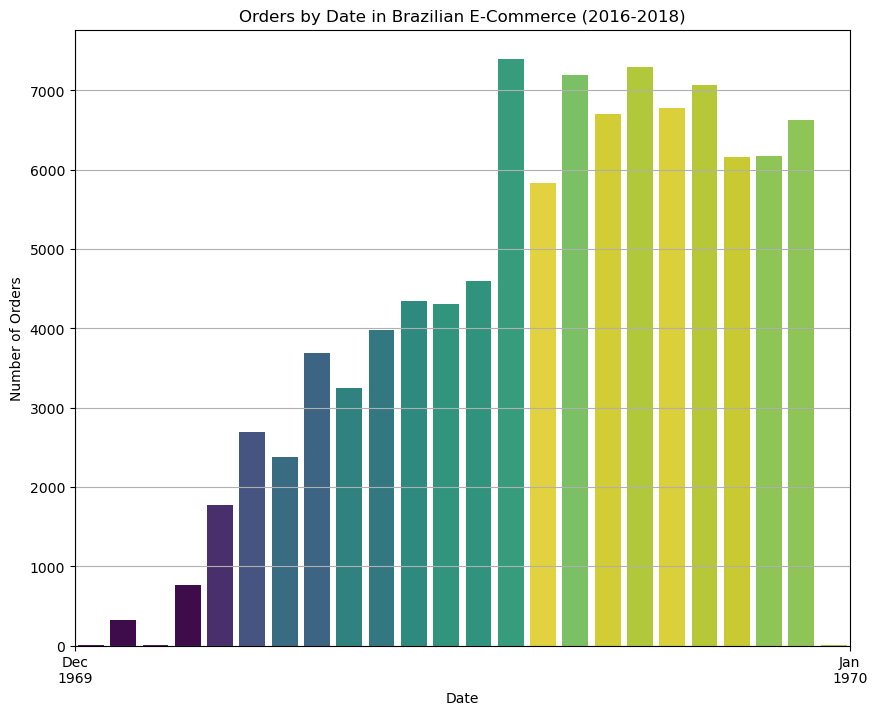

In [155]:
order_qty['date'] = pd.to_datetime(order_qty['date'])

plt.figure(figsize=(10, 8))
palette = sns.color_palette("viridis", as_cmap=True)  
sns.barplot(x='date', y='order_qty', data=order_qty, palette=palette(order_qty['order_qty']/order_qty['order_qty'].max()))


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  

plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Orders by Date in Brazilian E-Commerce (2016-2018)')
plt.grid(True)

plt.savefig('nombre_del_archivo.png')
plt.show()

2. Grafica de total de ventas historicas

In [141]:

query = (
      'SELECT DATE_FORMAT(a.order_approved_at, "%%Y-%%m") AS date, '
      '       SUM(b.price) AS sales '
      'FROM orders AS a '
      'INNER JOIN order_items AS b '
      'ON a.order_id = b.order_id '
      'GROUP BY date '
      'ORDER BY date '
      )


sales_sum = pd.read_sql(query, db)
sales_sum.head(5)


,date,sales
0,None,1670.43
1,2016-09,134.97
2,2016-10,49640.05
3,2016-12,10.90
4,2017-01,114860.71


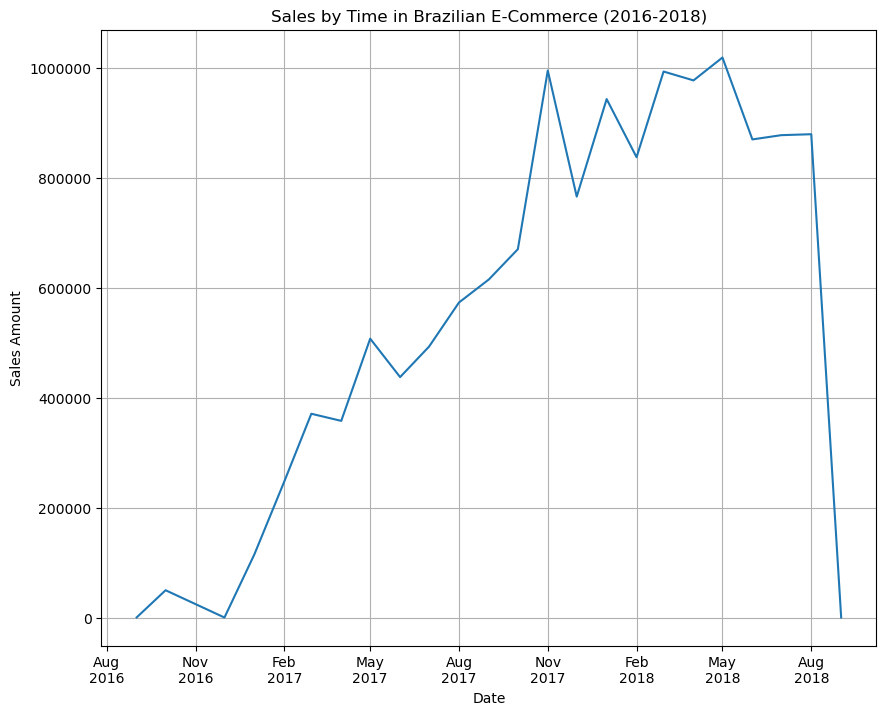

In [153]:
sales_sum['date'] = pd.to_datetime(sales_sum['date'])  

plt.figure(figsize=(10, 8))
sns.lineplot(x='date', y='sales', data=sales_sum)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales by Time in Brazilian E-Commerce (2016-2018)')
plt.grid(True)

plt.savefig('nombre_del_archivo.png')
plt.show()

In [ ]:
# Crear un objeto cursor
cursor = conn.cursor()  

query1 = """
    SELECT product_id
    FROM (
        SELECT product_id, COUNT(product_id) AS repeticiones
        FROM order_items
        GROUP BY product_id
        HAVING COUNT(product_id) >= 100
        LIMIT 10
    ) AS subquery;
"""
cursor.execute(query1)
for (product_id,) in cursor:
    print(f"Producto vendido al menos 100 veces: {product_id}")

cursor.close()


Producto vendido al menos 100 veces: 06edb72f1e0c64b14c5b79353f7abea3
Producto vendido al menos 100 veces: 08574b074924071f4e201e151b152b4e
Producto vendido al menos 100 veces: 0a57f7d2c983bcf8188589a5fea4a8da
Producto vendido al menos 100 veces: 0aabfb375647d9738ad0f7b4ea3653b1
Producto vendido al menos 100 veces: 0bcc3eeca39e1064258aa1e932269894
Producto vendido al menos 100 veces: 154e7e31ebfa092203795c972e5804a6
Producto vendido al menos 100 veces: 165f86fe8b799a708a20ee4ba125c289
Producto vendido al menos 100 veces: 19c91ef95d509ea33eda93495c4d3481
Producto vendido al menos 100 veces: 2028bf1b01cafb2d2b1901fca4083222
Producto vendido al menos 100 veces: 2b4609f8948be18874494203496bc318


3. Grafica de barras de categorias mas vendidas

In [143]:

query = (
      'SELECT product_category_name AS product, '
      '       COUNT(product_category_name) AS qty '
      'FROM products '
      'GROUP BY product '
      'ORDER BY qty DESC '
      )


categorie_sales= pd.read_sql(query, db)
categorie_sales.head(5)


,product,qty
0,cama_mesa_banho,3029
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335


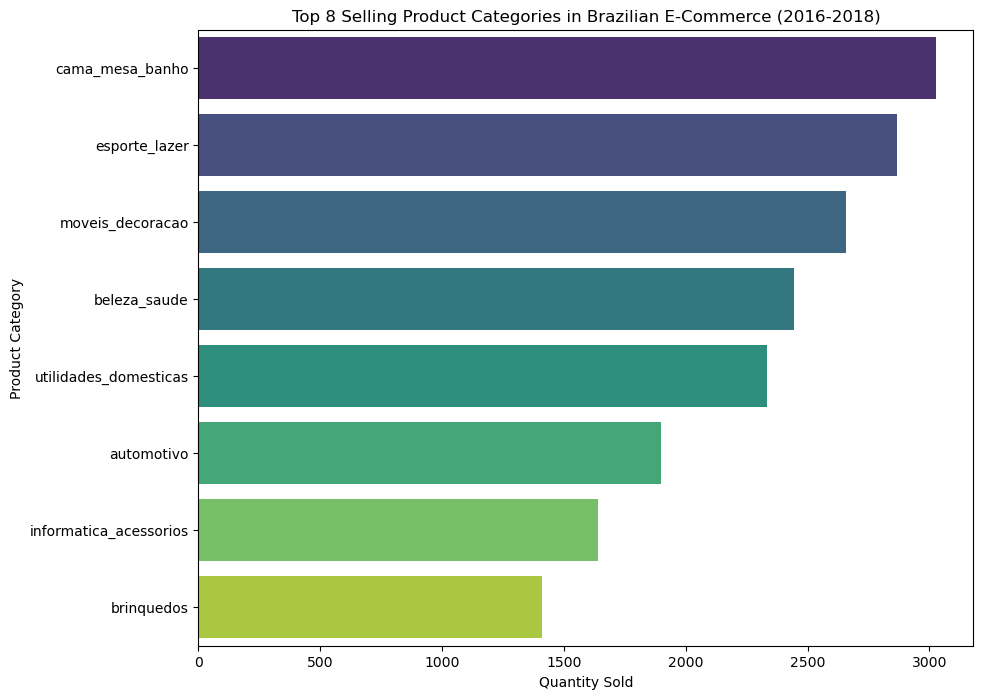

In [151]:

top = categorie_sales.head(8)

plt.figure(figsize=(10, 8))
sns.barplot(x='qty', y='product', data=top, palette='viridis')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Category')
plt.title('Top 8 Selling Product Categories in Brazilian E-Commerce (2016-2018)')
plt.savefig('nombre_del_archivo.png')
plt.show()
